En este archivo comparamos los datos como series de tiempo por mes. Por una lado usamos las 'ventas', 'litros' y 'precio promedio de gas' vendidos semanalmente y por el otro variables como 'Índice de precios al consumidor para energéticos' (INPC) y el 'Importaciones de Gas LP'. 

In [ ]:
import pandas as pd
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import matplotlib.dates as mdates
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importamos los datos de ventas de los años 2017-2022**

In [ ]:
SalesTotal = pd.read_pickle('/content/drive/MyDrive/DATATHON_DSC/Sales_Total/Sales_Total.h5')
SalesTotal

,Empresa,Region,Filial,PdVenta,KeyCliente,KeyFecha,KeyFolio,KeyTicket,Litros,Venta
225847,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Centro,SAN NICOLAS,E.C. RUIZ CORTINEZ 2,M00938,2017-01-01,Cf16R0,yyx7D8,2.0,13.0
111653,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,MONTEMORELOS,E.C. CRUZ VERDE,MM0143,2017-01-01,EH14hM,yvC3PX,3.0,26.0
111652,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,MONTEMORELOS,E.C. CRUZ VERDE,MM0143,2017-01-01,EH14hL,yvC3PW,5.0,40.0
111651,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,MONTEMORELOS,E.C. CRUZ VERDE,MM0143,2017-01-01,EH14hK,yvC3PV,6.0,53.0
111650,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Este,MONTEMORELOS,E.C. CRUZ VERDE,MM0143,2017-01-01,EH14hJ,yvC3PU,2.0,13.0
...,...,...,...,...,...,...,...,...,...,...
209781,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Centro,REYNOSA,ATQ. REY 06,RY0001,2021-12-31,3000-62B9-F62A-1000-1EE2,zVOADA,8.0,81.0
209780,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Centro,REYNOSA,ATQ. REY 23 (077),RY0001,2021-12-31,3001-72B9-F643-9000-83AC,zVOAD9,3.0,28.0
209779,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Centro,REYNOSA,ATQ. REY 23 (077),RY0001,2021-12-31,3001-72B9-F63F-9800-83AB,zVOAD7,13.0,134.0
209794,"MERCANTIL DISTRIBUIDORA, S.A. DE C.V.",Centro,REYNOSA,ATQ. REY 10,RY0001,2021-12-31,3004-F2B9-F382-7800-194D,zVOADX,3.0,31.0


**Agregamos una tabla con el precio del gas**

In [ ]:
SalesTotalGas = SalesTotal.assign(PrecioGas = SalesTotal.Venta/ SalesTotal.Litros)
SalesTotalGas = SalesTotalGas.sort_values(by="KeyFecha")
SalesTotalGas['PrecioGas'] = SalesTotalGas['PrecioGas'].replace(np.inf, np.nan)

**Calculamos una suma de todas las ventas por mes, y el promedio del precio del gas por mes**

In [ ]:
SalesTotalGasDate = SalesTotalGas.set_index("KeyFecha").groupby(pd.Grouper(freq="M")).sum().reset_index()
PrecioPromGasDate = SalesTotalGas.set_index("KeyFecha").groupby(pd.Grouper(freq="M")).mean().reset_index()
SalesTotalLitrosDate = SalesTotalGasDate[['KeyFecha', 'Litros']]
SalesTotalVentaDate = SalesTotalGasDate[['KeyFecha', 'Venta']]
PrecioPromGasDate = PrecioPromGasDate[['KeyFecha', 'PrecioGas']]

**Analizamos otras posibles variables mensuales: El INCP (Indice Nacional de precios al consumidor para energéticos), extraídos del INEGI, y las importaciones de Gas LP en México (miles de barriles) por mes**


*   https://datos.gob.mx/busca/dataset/indice-nacional-de-precios-al-consumidor-inpc
*   https://sie.energia.gob.mx/bdiController.do?action=cuadro&cvecua=PMXE2C15





In [ ]:
INPC_M = pd.read_csv('/content/drive/MyDrive/DATATHON_DSC/Variables_Mensuales/INPC.csv', low_memory=False, index_col=False, thousands=',',encoding='latin-1')
INPC_M = INPC_M[1096:1157]
INPC_M = INPC_M[['FECHA','VALOR']]
INPC_M['FECHA'] = INPC_M['FECHA'].map(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y"))
INPC_M = INPC_M.set_index("FECHA")
importaciones_mx = pd.read_csv('/content/drive/MyDrive/DATATHON_DSC/Variables_Mensuales/importaciones.csv', low_memory=False, index_col=False, thousands=',',encoding='latin-1')
importaciones_mx = importaciones_mx[['Fecha','GasLPab']]
importaciones_mx['Fecha'] = importaciones_mx['Fecha'].map(lambda x: datetime.datetime.strptime(x, "%d/%m/%Y"))
importaciones_mx = importaciones_mx.set_index("Fecha")

In [ ]:
SalesTotalLitrosDate = SalesTotalLitrosDate.set_index("KeyFecha")
SalesTotalVentaDate = SalesTotalVentaDate.set_index("KeyFecha")
PrecioPromGasDate = PrecioPromGasDate.set_index("KeyFecha")

**Graficamos las variables**

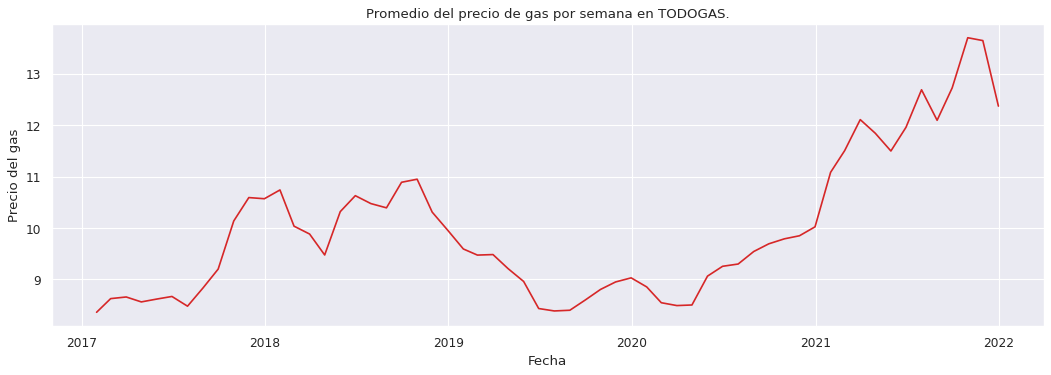

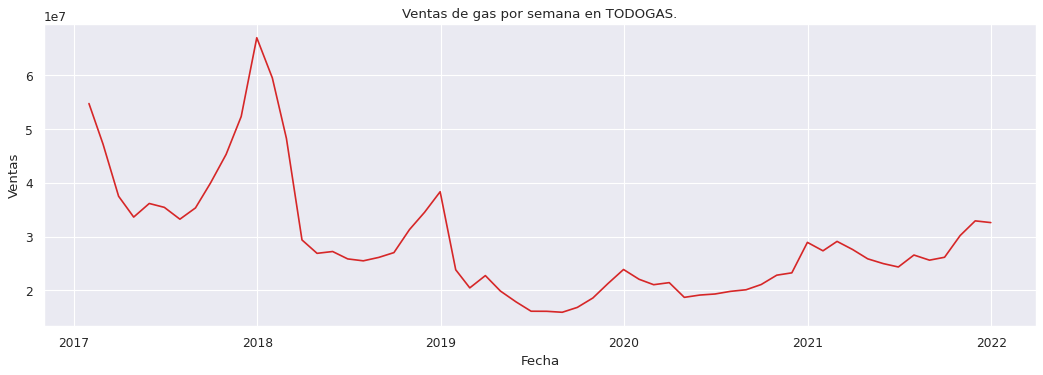

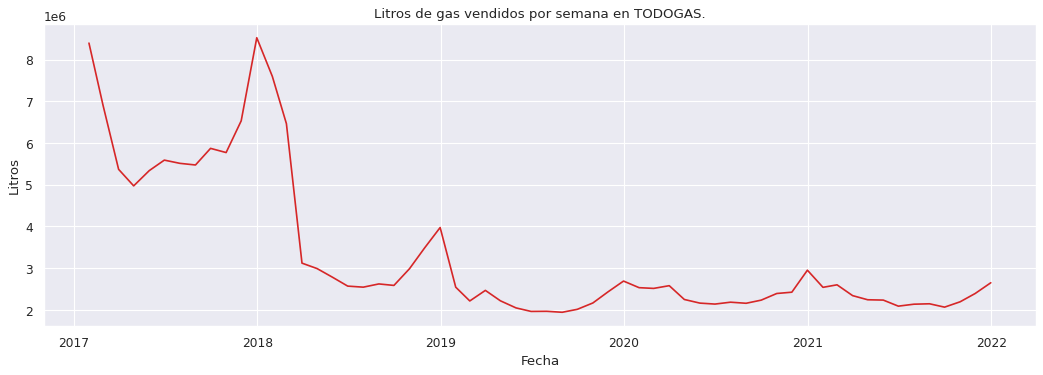

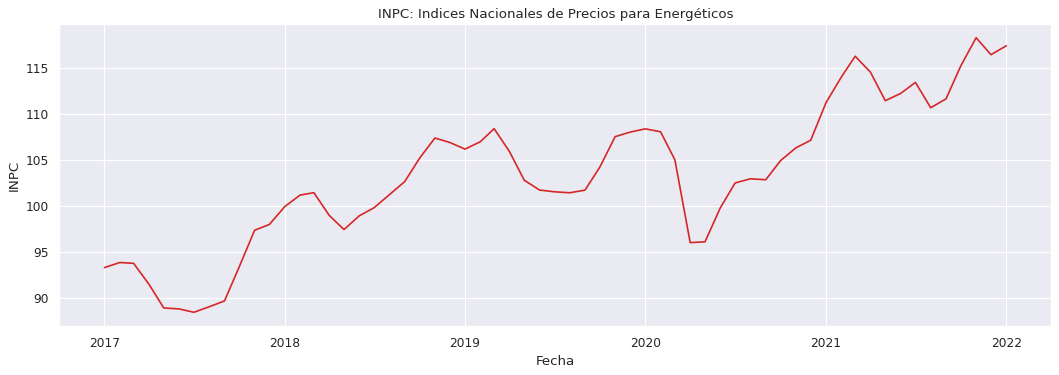

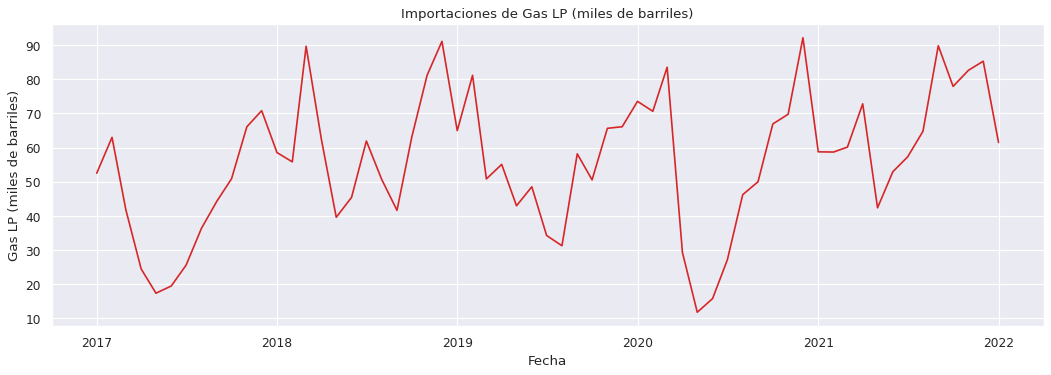

In [ ]:
def plot_sales(SalesTotalVentaDate, x, y, title="", xlabel='Fecha', ylabel='Ventas', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
 

def plot_litros(SalesTotalLitrosDate, x, y, title="", xlabel='Fecha', ylabel='Litros', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

def plot_gaspromedio(PrecioPromGasDate, x, y, title="", xlabel='Fecha', ylabel='Precio del gas', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

def plot_INPC(INPC_M, x, y, title="", xlabel='Fecha', ylabel='INPC', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

def plot_importaciones(importaciones_mx, x, y, title="", xlabel='Fecha', ylabel='Gas LP (miles de barriles)', dpi=80):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_gaspromedio(PrecioPromGasDate, x=PrecioPromGasDate.index, y=PrecioPromGasDate.values, title='Promedio del precio de gas por semana en TODOGAS.')
plot_sales(SalesTotalVentaDate, x=SalesTotalVentaDate.index, y=SalesTotalVentaDate.values, title='Ventas de gas por semana en TODOGAS.')
plot_litros(SalesTotalLitrosDate, x=SalesTotalLitrosDate.index, y=SalesTotalLitrosDate.values, title='Litros de gas vendidos por semana en TODOGAS.')
plot_INPC(INPC_M, x=INPC_M.index, y=INPC_M.values, title='INPC: Indices Nacionales de Precios para Energéticos')   
plot_importaciones(importaciones_mx, x=importaciones_mx.index, y=importaciones_mx.values, title='Importaciones de Gas LP (miles de barriles)')  

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/DATATHON_DSC/Analisis_Variables_Mensual.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/DATATHON_DSC/Analisis_Variables_Mensual.ipynb to html
[NbConvertApp] Writing 532995 bytes to /content/drive/MyDrive/DATATHON_DSC/Analisis_Variables_Mensual.html
